# Анализ рынка недвижимости

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Задача — установить параметры, по которым возможно определять рыночную стоимость объектов недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных.  

1. [Получение данных.](#step1)  
2. [Предобработка данных.](#step2)  
3. [Добавление новых параметров.](#step3) 
4. [Исследовательский анализ данных.](#step4) 
5. [Общий вывод.](#step5) 

## Получение данных. <a id="step1"></a>    

### Импорт библиотек

In [1]:
! pip install pandas -U
! pip install matplotlib -U

import pandas as pd
import matplotlib as plt

import warnings
warnings.filterwarnings('ignore')

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: pandas in /home/jovyan/.local/lib/python3.7/site-packages (1.3.4)
Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: matplotlib in /home/jovyan/.local/lib/python3.7/site-packages (3.4.3)


Прочитаем файл *real_estate_data* и сохраним его в переменной *df*. 

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

Получим первые строки таблицы.

In [3]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Получим общую информацию о данных таблицы *df*.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Рассмотрим полученную информацию подробнее.

Всего в таблице 22 столбца, тип данных - **bool**, **float64**, **int64**, **object**.

Подробно разберём, какие в *df* столбцы и какую информацию они содержат:

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м);
* balcony — число балконов;
* ceiling_height — высота потолков (м);
* cityСenters_nearest — расстояние до центра города (м);
* days_exposition — сколько дней было размещено объявление (от публикации до снятия);
* first_day_exposition — дата публикации;
* floor — этаж;
* floors_total — всего этажей в доме;
* is_apartment — апартаменты (булев тип);
* kitchen_area — площадь кухни в квадратных метрах (м²);
* last_price — цена на момент снятия с публикации;
* living_area — жилая площадь в квадратных метрах(м²);
* locality_name — название населённого пункта;
* open_plan — свободная планировка (булев тип);
* parks_around3000 — число парков в радиусе 3 км;
* parks_nearest — расстояние до ближайшего парка (м);
* ponds_around3000 — число водоёмов в радиусе 3 км;
* ponds_nearest — расстояние до ближайшего водоёма (м);
* rooms — число комнат;
* studio — квартира-студия (булев тип);
* total_area — площадь квартиры в квадратных метрах (м²);
* total_images — число фотографий квартиры в объявлении.

Количество значений в столбцах различается. Это говорит о том, что в данных есть пустые значения.

### Выводы

Каждая строка таблицы содержит информацию об отдельном объявлении о продаже квартиры. Проблемы, которые нужно решать -  пропуски в столбцах: *ceiling_height*, *floors_total*, *living_area*, *is_apartment*, *kitchen_area*, *balcony*, *locality_name*, *airports_nearest*, *cityсenters_nearest*, *parks_around3000*, *parks_nearest*, *ponds_around3000*, *ponds_nearest*, *days_exposition*.

## Предобработка данных. <a id="step2"></a> 

### Обработка пропусков

Проверим данные на наличие пропусков вызовом набора методов для суммирования пропущенных значений.

In [5]:
df.isnull().sum() 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

9195 пропусков в столбце с высотой потолка. Возможно, пропуски в столбце *ceiling_height* связаны с тем, что 39% пользователей не обладали данными о высоте потолка и не заполнили поле. Значения в столбце *ceiling_height* — количественные переменные, заменим пропуски характерным значением. Посчитаем медиану для столбца *ceiling_height*.

In [6]:
print(df['ceiling_height'].median())

2.65


Заменим пропущенные значения в столбце на медиану и проверим, что столбец больше не содержит пропусков.

In [7]:
df['ceiling_height'] = df['ceiling_height'].fillna(2.65)

In [8]:
df['ceiling_height'].isnull().sum() 

0

86 пропусков в столбце *floors_total*. Возможно, пропуски в столбце связаны с тем, что пользователь пропустил это поле при заполнении. Оставим пустые значения на месте, не будем удалять, так как это ценные данные для нашего анализа.

1903 пропуска в столбце *living_area*. Возможно, пустые значения в столбце связаны с тем, что пользователь пропустил это поле при заполнении, либо не обладал данными. Заменим пропуски характерными значениями жилой площади, посчитанными в разных группах квартир по числу комнат. Проверим, что столбец больше не содержит пропусков.

In [9]:
median_living_area = df.groupby('rooms')['living_area'].median().to_dict()
def filler_func(row):
    if pd.isna(row['living_area']):
        return median_living_area[row['rooms']]
    return row['living_area']
 
df['living_area'] = df.apply(filler_func, axis=1)

Вызовем метод .unique(), который анализирует столбец и выбирает каждое уникальное значение. Применим метод к столбцу *is_apartment*. 

In [10]:
print(df['is_apartment'].unique())

[nan False True]


Если квартира является апартаментами - значение True, если нет - False. Пропуски в столбце, вероятно, говорят о том, что пользователь при заполнении оставил этот пункт пустым, так как его недвижимость не относится к категории апартаментов. Заменим пустые значения на False

In [11]:
df['is_apartment'] = df['is_apartment'].fillna(False)
print(df['is_apartment'].unique())

[False  True]


2278 пустых значения в столбце *kitchen_area*. Возможно, пропуски в столбце связаны с тем, что пользователь пропустил это поле при заполнении, либо не обладал данными, либо в квартире нет отдельной кухни и ее площадь входит в жилую площадь.  

Применим метод unique() к столбцу *rooms* и найдем все уникальные значения.

In [12]:
print(df['rooms'].unique())

[ 3  1  2  4  5  6  0  7 11  8 14 10 15  9 19 16 12]


Рассмотрим таблицу, в котрой количество комнат = 0, а в столбце *kitchen_area* пустое значение.

In [13]:
print(df[(df['rooms'] == 0) & (df['kitchen_area'] == 'NaN')])

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition]
Index: []

[0 rows x 22 columns]


Датафрейм пуст. Часть пропусков в столбце *kitchen_area* связана с тем, что кухня не является отдельным помещением. Заменим эти пустые значения на '0'.

In [14]:
df.loc[df['rooms'] == 0,'kitchen_area'] = df.loc[df['rooms'] == 0, 'kitchen_area'].fillna(value = 0)

Остальные пропуски в столбце *kitchen_area* заменим характерными значениями площади кухни, посчитанными в разных группах квартир по числу комнат. Проверим, что столбец больше не содержит пропусков.

In [15]:
median_kitchen_living_area = df.groupby('rooms')['kitchen_area'].median().to_dict()
def filler_func(row):
    if pd.isna(row['kitchen_area']):
        return median_kitchen_living_area[row['rooms']]
    return row['kitchen_area']
 
df['kitchen_area'] = df.apply(filler_func, axis=1)

In [16]:
df['kitchen_area'].isnull().sum() 

0

11519 пустых значений в столбце *balcony*. Вероятно, пользователь пропустил этот пункт при заполнении, так как в квартире нет балкона. Заменим пустые значения на '0' и проверим, что столбец больше не содержит пропусков.

In [17]:
df['balcony'] = df['balcony'].fillna(0) 

In [18]:
df['balcony'].isnull().sum() 

0

49 пропусков в столбце *locality_name*. Возможно, пропуски в столбце связаны с тем, что пользователь пропустил это поле при заполнении, либо не обладал данными. Строк мало, оставим их. В первую очередь мы анализируем рынок недвижимости в целом, эти данные пригодятся и пропуски на исследование не повлияют.

Значения в столбцах *airports_nearest*, *parks_around3000*, *ponds_around3000*, *ponds_nearest* получены автоматически на основе картографических данных. В них большое количество пропусков. Возможно, пустые значения появились, так как в радиусе 3 км (и близко к недвижимости) нет парков, водоемов, аэропортов. Для дальнейшего исследования эти столбцы не понадобятся. Исключим их из датафрейма (а так же столбцы *total_images*, *is_apartment*, *studio*, *open_plan*), так как в таблице много столбцов и с ней неудобно работать.

In [19]:
columns = [
    'last_price',
    'total_area',
    'living_area',
    'kitchen_area',
    'floors_total',
    'floor',
    'balcony',
    'first_day_exposition',
    'days_exposition',
    'rooms',
    'ceiling_height',
    'cityCenters_nearest',
    'locality_name',
]
df = df[columns]

Пустые значения в *days_exposition* могли возникнуть из-за того, что квартира еще не продана и объявление не сняли, объявление забыли снять после продажи квартры, либо проблемы с записью данных. Пропуски в столбце *cityCenters_nearest* могли возникнуть из-за проблем с получением автоматических данных. Оставим эти значения пустыми, так как нет подходящих значений на замену.

Проверим наличие дубликатов в таблице методом .duplicated(). В сочетании с методом sum() он возвращает количество дубликатов. Если найдутся, удалим, и проверим, все ли удалились.

In [20]:
print(df.duplicated().sum()) 

0


Дубликатов нет. Данные пригодны для исследования.

### Замена типа данных

Приведем дату публикации к типу datetime.

In [21]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Заменим вещественный тип данных в столбце *balcony* на целочисленный методом .astype() c аргументом ('int'). 

In [22]:
df['balcony'] = df['balcony'].astype('int')

### Выводы

На этапе предобработки в данных обнаружились пропуски. Для некоторых пропущенных значений мы предположили логичную замену. Для других типов данных нет подходящего значения на замену. В этом случае правильно оставить эти значения пустыми. Отсутствие значения — тоже важный сигнал, который не нужно прятать.

## Добавление новых параметров. <a id="step3"></a> 

Посчитаем и добавим в таблицу отдельный столбец с ценой квадратного метра.

In [23]:
df['price_per_area'] = df['last_price'] / df['total_area']

Посчитаем и добавим в таблицу отдельные столбцы с днем недели, месяцем и годом публикации объявления. Понедельник — день под номером 0, а воскресенье — шестой день.

In [24]:
df['first_exposition_day_of_week'] = df['first_day_exposition'].dt.weekday
df['first_exposition_month'] = df['first_day_exposition'].dt.month
df['first_exposition_year'] = df['first_day_exposition'].dt.year

Посчитаем и добавим в таблицу этаж квартиры: первый (first), последний (last), другой (other). Опишем функцию:

In [25]:
def flooroption(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'first'
    elif floor == floors_total:
        return 'last'
    else:
        return 'other'

Создадим отдельный столбец с категориями по этажу квартиры, и в его ячейках запишем значения, возвращаемые функцией.

In [26]:
df['floor_option'] = df.apply(flooroption, axis=1)

Посчитаем и добавим в таблицу отдельный столбец с соотношением жилой и общей площади.

In [27]:
df['living_total_ratio'] = df['living_area'] / df['total_area']

Посчитаем и добавим в таблицу отдельный столбец с соотношением площади кухни и общей площади.

In [28]:
df['living_kitchen_ratio'] = df['kitchen_area'] / df['total_area']

### Выводы

Мы добавили в таблицу новые параметры для оценки зависимости рыночной стоимости недвижимости от них. 

## Исследовательский анализ данных. <a id="step4"></a> 

### Исследование параметров: цена, площадь, количество комнат, высота потолков, время продажи квартир

Изучим следующие параметры: площадь, цена, число комнат, высота потолков, время продажи квартиры. Построим гистограммы для каждого параметра.

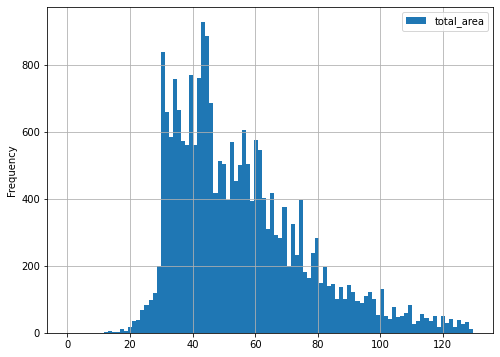

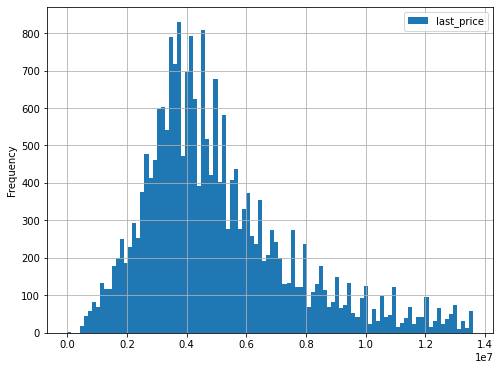

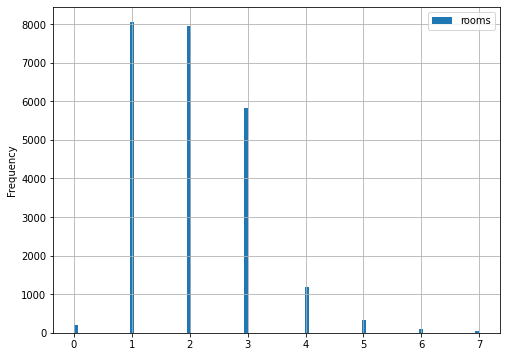

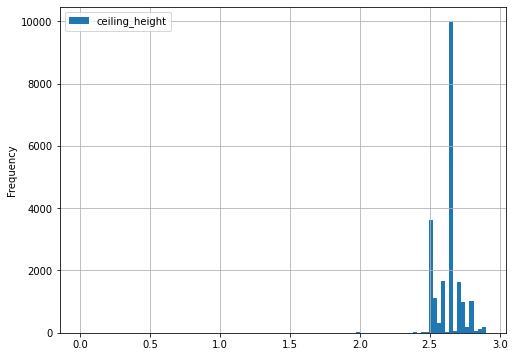

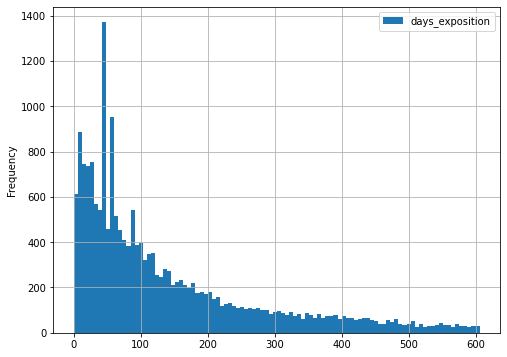

In [29]:
columns = ['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition']
 
for i in range(len(columns)):
    Q1 =  df[columns[i]].quantile(0.25)
    Q3 = df[columns[i]].quantile(0.75)
    IQR = Q3 - Q1
    ranges = (0, Q1+3*IQR)
    
    df.plot(y = columns[i], kind = 'hist', bins = 100, grid=True, figsize = (8,6), range = ranges)
    
    df[columns[i]].describe()

Посчитаем среднее и медиану времени продажи квартиры.

In [30]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

### Выводы

Гистограмма по столбцу *total_area* показывает, что больше всего объявлений о продаже квартир площадью 30 - 60 м2, с отдельными узкими пиками в диапазоне и с длинным хвостом на высоких значениях. Такая площадь обычно соответсвует 1, 2-х комнатным квартирам. 

Гистограмма по столбцу *last_price* показывает, что больше всего объявлений о продаже квартир ценой 3 - 6 млн, с отдельными узкими пиками в диапазоне и с длинным хвостом на высоких значениях. 

Гистограмма по столбцу *rooms* показывает, что больше всего объявлений о продаже однокомнатных квартирах, на втором месте - двухкомнатные, на третьем - трехкомнатные. 

Гистограмма по столбцу *days_exposition* показывает, что наиболее часто продажа квартиры занимает до 100 дней, с отдельными узкими пиками в районе 45, 60 дней. Много значений около нуля, что станно, квартиру не могли так быстро продать. Можно считать, что продажи прошли очень быстро, если объявление сняли в период до 50 дней, необычно долго, если объявление активно более 180 дней.

### Анализ редких и выбивающихся значений

Посмотрим, какие значения встречаются в столбце *total_area*. 

<AxesSubplot:title={'center':'Значения площадей квартир в квадратных метрах'}>

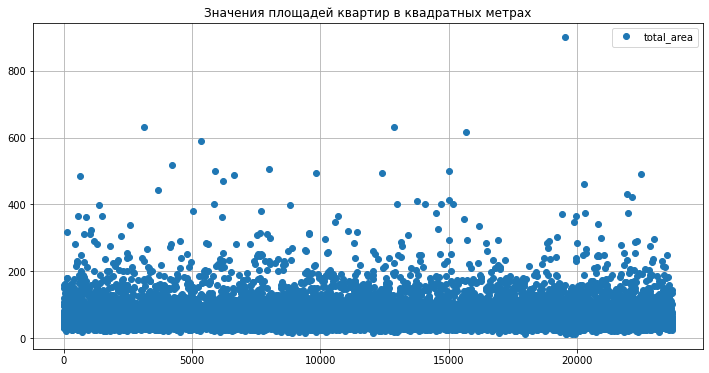

In [31]:
df.plot(y='total_area', style='o', grid=True, figsize=(12,6), title='Значения площадей квартир в квадратных метрах')

In [32]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Площадь большей части квартир не превышает 70м2. На графике видим, что квартиры площадью больше 200м2 встречаются редко, а больше 400м2 - отдельные единичные значения.

Посмотрим, какие значения встречаются в столбце *rooms*. 

In [33]:
df['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

Квартиры с количеством комнат 8 и более - редкие значения.

Посмотрим, какие значения встречаются в столбце *ceiling_height*. 

<AxesSubplot:title={'center':'Значения высоты потолков в метрах'}>

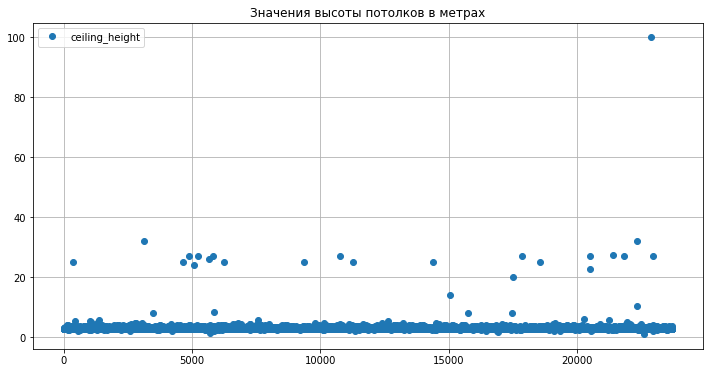

In [34]:
df.plot(y='ceiling_height', style='o', grid=True, figsize=(12,6), title='Значения высоты потолков в метрах')

In [35]:
df['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Встречаются редкие значения с высотой потолка в квартирах более 4м.

Посмотрим, какие значения встречаются в столбце *last_price*. 

<AxesSubplot:title={'center':'Цена на момент снятия с публикации'}>

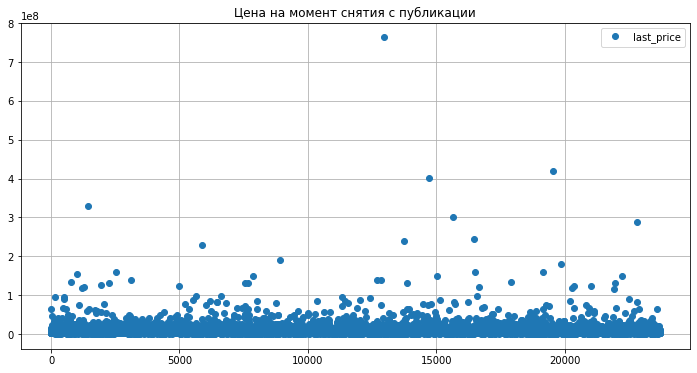

In [36]:
df.plot(y='last_price', style='o', grid=True, figsize=(12,6), title='Цена на момент снятия с публикации')

Большая часть квартир стоит до 15 000 000 рублей, но встречаются и редкие значения выше этой стоимости.

<AxesSubplot:title={'center':'Время размещения объявления (от публикации до снятия)'}>

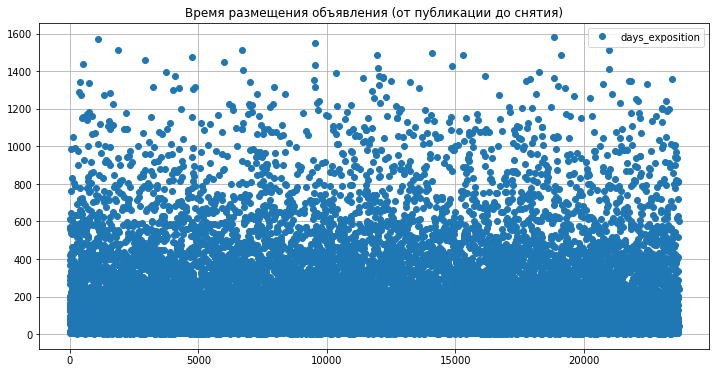

In [37]:
df.plot(y='days_exposition', style='o', grid=True, figsize=(12,6),\
        title='Время размещения объявления (от публикации до снятия)')

Время продажи более 800 дней и менее 5 дней  - редкие значения.

Получим датафрейм без редких значений.

In [38]:
df_normal = df[(df['total_area'] < 200) & (df['rooms'] <= 7)\
               & (df['ceiling_height'] < 4) & (df['last_price'] < 15000000)\
               & (df['days_exposition'] > 5) & (df['days_exposition'] < 800) ].reset_index(drop=True)

### Выводы

В датафрейме встречаются редкие и выбивающиеся значения: площадь квартир более 200 м2, квартиры с количеством комнат 8 и более, цена квартир более 15 000 000 р, период продажи менее 5 дней и более 800 дней. 

###  Исследование зависимости рыночной стоимости недвижимости от параметров

Изучим, как зависит цена квартиры от площади, числа комнат, удалённости от центра, от даты размещения: дня недели, месяца и года. Построим диаграммы рассеяния.

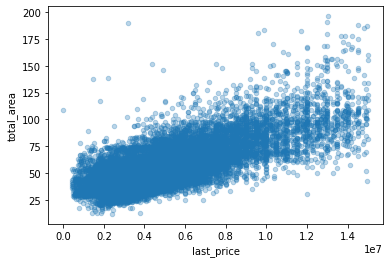

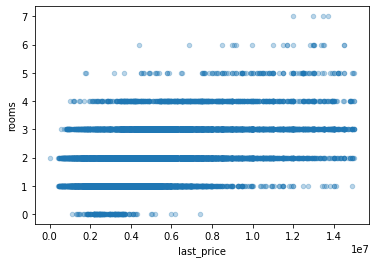

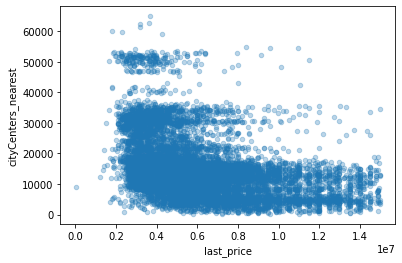

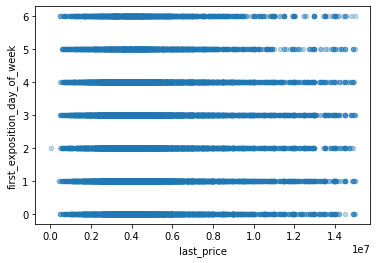

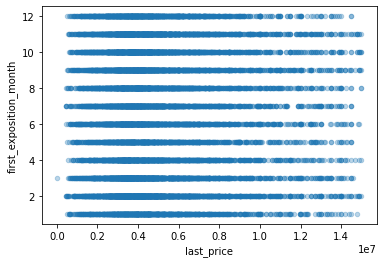

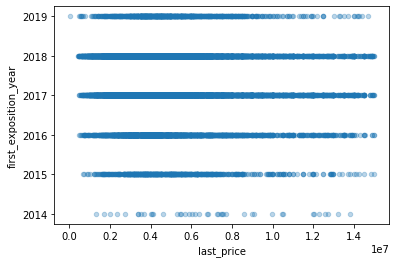

In [39]:
y_columns = ['total_area', 'rooms', 'cityCenters_nearest', 
             'first_exposition_day_of_week', 'first_exposition_month', 'first_exposition_year']
for y in y_columns:
    df_normal.plot(x='last_price', y=y, kind='scatter', alpha=0.3)

Изучим, как зависит цена квартиры от этажа, на котром расположена (первый, последний, другой).

In [40]:
df_normal.pivot_table(index='floor_option', values='last_price', aggfunc=['count','mean'])

,count,mean
,last_price,last_price
floor_option,,
first,2305,4.109392e+06
last,2503,4.720329e+06
other,13757,5.222523e+06


### Выводы

При увеличении площади, цена квартиры растет. Более того, зависимость неплохо описывается простой линейной функцией (между признаками есть линейная зависимость) и будет довольно высокий коэффициент корреляции. 

При увеличении числа комнат, цена квартиры растет.

По графику зависимости цены кварты от удаленности от центра видно, что наиболее высокая цена у квартир, находящихся на расстяонии 15-20 км от центра города. Цена более удаленных квартир начинает уменьшаться.

Цена квартиры не зависит от даты размещения объявления (дня, месяца, года).

Цена квартиры завист от этажа. Наиболее дешевые располагаются на 1 этаже. Квартиры на последнем этаже так же имеют меньшую рыночную стоимость, чем квартиры на других этажах (начиная со второго).

### Исследование 10 населённых пунктов с наибольшим числом объявлений

Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья.

In [41]:
df_top_10 = (
    df_normal
    .groupby('locality_name')['price_per_area'].agg(['count', 'mean'])
    .sort_values(by='count', ascending=False))
df_top_10.head(10)

,count,mean
locality_name,,
Санкт-Петербург,12045,105718.259750
посёлок Мурино,487,85887.344732
посёлок Шушары,394,77970.509322
Всеволожск,320,66824.601935
Колпино,293,74650.452580
посёлок Парголово,288,89491.725924
деревня Кудрово,283,92387.903404
Пушкин,271,99138.016385
Гатчина,249,68046.455716


### Выводы

Населенный пункт с самым большим количетвом объявлений и самой высокой стоимостью жилья - Санкт-Петербург, с самой низкой стоимостью жилья - Выборг.

###  Исследование зависимости рыночной стоимости недвижимости от параметров в центре Санкт-Петербурга

Выясним, какая область относится к центру Санкт-Петербурга.

<AxesSubplot:xlabel='distance_to_center'>

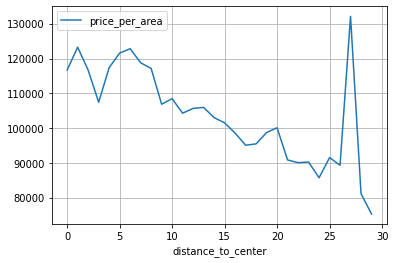

In [42]:
df_center = df_normal.query('locality_name == "Санкт-Петербург"')
df_center['distance_to_center'] = round(df_center['cityCenters_nearest'] / 1000, 0)
df_center.pivot_table(index='distance_to_center', values = 'price_per_area').plot(grid=True)

График сильно меняется в районе 8 км. Примем за центральную зону расстояние до 8 км включительно.

Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

In [43]:
df_center_spb = df_center[df_center['distance_to_center'] <= 8]

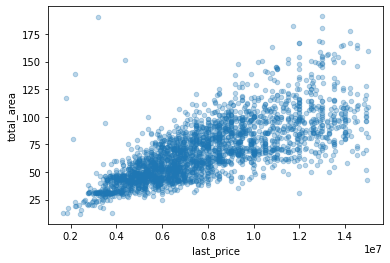

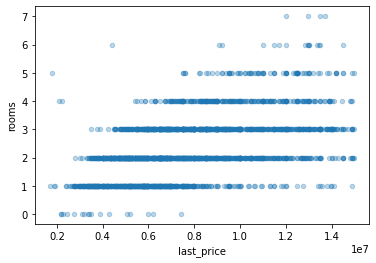

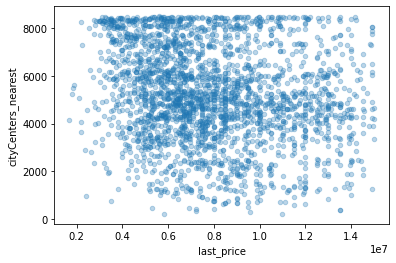

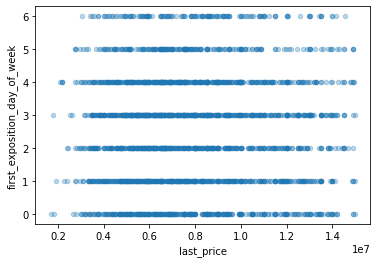

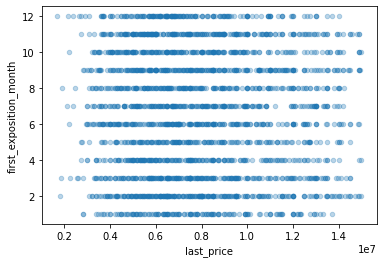

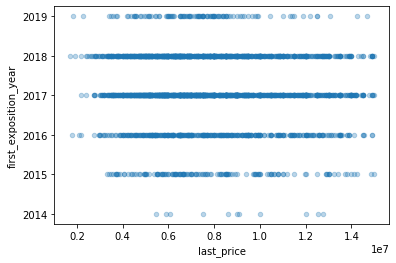

In [44]:
y_columns = ['total_area', 'rooms', 'cityCenters_nearest', 
             'first_exposition_day_of_week', 'first_exposition_month', 'first_exposition_year']
for y in y_columns:
    df_center_spb.plot(x='last_price', y=y, kind='scatter', alpha=0.3)

In [45]:
df_center_spb.pivot_table(index='floor_option', values='last_price', aggfunc=['count','mean'])

,count,mean
,last_price,last_price
floor_option,,
first,314,6.441531e+06
last,422,7.916800e+06
other,1817,8.121565e+06


### Выводы

При увеличении площади, цена квартиры растет. Более того, зависимость неплохо описывается простой линейной функцией (между признаками есть линейная зависимость) и будет довольно высокий коэффициент корреляции. 

При увеличении числа комнат, цена квартиры растет.

По графику зависимости цены квартиры от удаленности от центра видно, что рыночная стоимость квартир в центре Санкт-Петербурга не зависит от удаленности от центра города.

Цена квартиры не зависит от даты размещения объявления (дня, месяца, года).

Цена квартиры завист от этажа. Наиболее дешевые располагаются на 1 этаже. Квартиры на последнем этаже отличаются в меньшую стоимость от квартир на других этажах, но не так сильно, как в общей выборке по городу и области.

## Общий вывод. <a id="step5"></a> 

Параметры, от которых **зависит** рыночная стоимость недвижимости: общая площадь, количество комнат, этаж, на котором расположена квартира. Удаленность от центра - значимый параметр для квартир вне центра города, для квартир в центре данный критерий не влияет на рыночную стоимость. 
Параметры, от которых **не зависит** рыночная стоимость недвижимости: дата размещения объявления.